In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mode,mean
style.use('ggplot')
pd.set_option('display.max_columns', 500)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
os.getcwd()
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['Data.csv', 'Metadata.txt']


# Cleanup 

In [2]:
#Basic reading and cleaning
all_df = pd.read_csv('input\\Data.csv', encoding='latin-1')
all_df.drop(['Location', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL'],1,inplace = True)
# lets filter for Roger Federer
all_df.W3 = all_df.W3.fillna(0)
all_df.W4 = all_df.W4.fillna(0)
all_df.W5 = all_df.W5.fillna(0)
all_df.L3 = all_df.L3.fillna(0)
all_df.L4 = all_df.L4.fillna(0)
all_df.L5 = all_df.L5.fillna(0)
all_df.AvgW = all_df.AvgW.fillna(0)
all_df.AvgL = all_df.AvgL.fillna(0)

all_df.WRank = pd.to_numeric(all_df.WRank, errors = 'coerce') 
all_df.LRank = pd.to_numeric(all_df.LRank, errors = 'coerce')
all_df['Diff'] =  all_df.LRank - all_df.WRank 
all_df['Sets Diff'] = all_df.W1+all_df.W2+all_df.W3+all_df.W4+all_df.W5 - (all_df.L1+all_df.L2+all_df.L3+all_df.L4+all_df.L5)



year = [] 
unique = []
for row in range(len(all_df)):
    year.append(all_df.Date[row].split("/")[2])
    unique.append(str(all_df.ATP[row]) + '_' + all_df.Date[row].split("/")[2])
all_df['Year'] = year
#all_df.drop(['Date'],1,inplace= True)
all_df['ATP_Year'] = unique
print(all_df.columns)

#keep a copy
dfcopy= all_df


player1 = 'Federer R.'
player2 = 'Nadal R.'
#create a player1 and player 2
winner = all_df.Winner == player1
loser = all_df.Loser == player1
df1 = all_df[winner | loser]

winner = all_df.Winner == player2
loser = all_df.Loser == player2
df2 = all_df[winner | loser]



c:\users\varundandekar\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['ATP', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round',
       'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1', 'W2', 'L2',
       'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets', 'Comment', 'AvgW',
       'AvgL', 'Diff', 'Sets Diff', 'Year', 'ATP_Year'],
      dtype='object')


# Basic Win Loss Analysis

Federer R. :
Win/Loss:  1018 / 218
number of Tournaments:  301
number of finals:  134
number of titles won:  88


 Nadal R. :
Win/Loss:  779 / 171
number of Tournaments:  235
number of finals:  100
number of titles won:  68


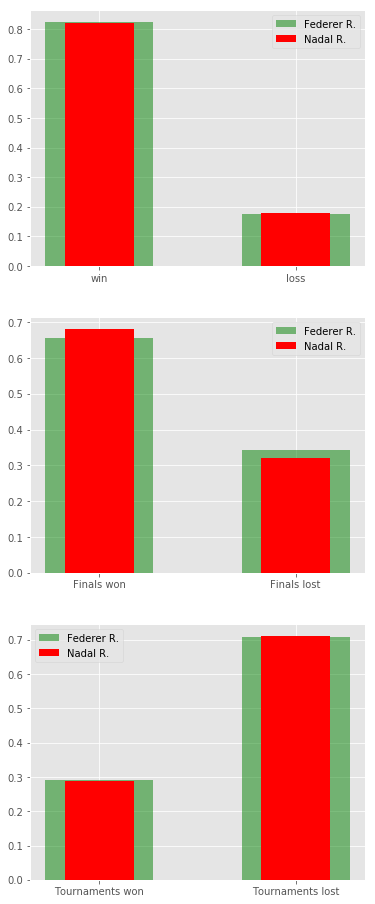

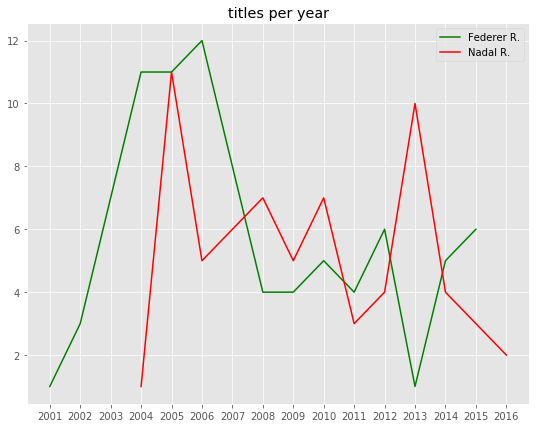

In [3]:
# Basic win loss analysis
#number of tournaments played = number of 1st round matches
num_tournaments1 = len(set(df1['ATP_Year']))
num_tournaments2 = len(set(df2['ATP_Year']))

#performance in each tournament
performance_df1 = df1.groupby('ATP_Year').last()
performance_df1 = performance_df1.sort_values (['Year','ATP',], ascending=[1, 1])
performance_df2 = df2.groupby('ATP_Year').last()
performance_df2 = performance_df2.sort_values (['Year','ATP',], ascending=[1, 1])

#win df
win_df1 = df1[df1.Winner ==player1]
win_df2 = df2[df2.Winner ==player2]

# matches played by player in 2000 to 2016 and win percentage
win_pct1 = len(win_df1)/len(df1)
win_pct2 = len(win_df2)/len(df2)

#finals played
final_df1 = performance_df1[performance_df1.Round == 'The Final']
final_df2 = performance_df2[performance_df2.Round == 'The Final']

#titles won
titles_df1 = final_df1[final_df1.Winner == player1]
titles_df2 = final_df2[final_df2.Winner == player2]

print(player1,":")
print('Win/Loss: ', len(df1[df1.Winner ==player1]),'/',len(df1[df1.Loser ==player1]))
print('number of Tournaments: ', num_tournaments1)
print('number of finals: ', len(final_df1))
print('number of titles won: ', len(titles_df1))

print('\n\n',player2,":")
print('Win/Loss: ', len(df2[df2.Winner ==player2]),'/',len(df2[df2.Loser ==player2]))
print('number of Tournaments: ', num_tournaments2)
print('number of finals: ', len(final_df2))
print('number of titles won: ', len(titles_df2))

#pie charts
fig = plt.figure(figsize = (6,16))

fig.add_subplot(3,1,1)
plt.bar(['win','loss'],[win_pct1,1-win_pct1], width= 0.55,  color='g', alpha = 0.5)
plt.bar(['win','loss'],[win_pct2,1-win_pct2], width= 0.35 , color='r')
plt.legend([player1,player2])


fig.add_subplot(3,1,2)
plt.bar(['Finals won','Finals lost'],[len(titles_df1)/len(final_df1), (len(final_df1)-len(titles_df1))/len(final_df1)],width= 0.55,  color='g', alpha = 0.5)
plt.bar(['Finals won','Finals lost'],[len(titles_df2)/len(final_df2), (len(final_df2)-len(titles_df2))/len(final_df2)], width= 0.35 , color='r')
plt.legend([player1,player2])

fig.add_subplot(3,1,3)
plt.bar(['Tournaments won','Tournaments lost'],[len(titles_df1)/num_tournaments1, (num_tournaments1-len(titles_df1))/num_tournaments1],width= 0.55,  color='g', alpha = 0.5)
plt.bar(['Tournaments won','Tournaments lost'],[len(titles_df2)/num_tournaments2, (num_tournaments2-len(titles_df2))/num_tournaments2], width= 0.35 , color='r')
plt.legend([player1,player2])

plt.show()

titles1 ={key:len(value) for key,value in titles_df1.groupby('Year').groups.items()}
titles2 ={key:len(value) for key,value in titles_df2.groupby('Year').groups.items()}

fig = plt.figure(figsize = (9,7))
plt.plot(*zip(*sorted(titles1.items())) ,color='g' ,label=player1,markersize=100)
plt.plot(*zip(*sorted(titles2.items())),color='r',label=player2,markersize=100)
plt.title('titles per year')
plt.legend()
plt.show()

This shows the win loss percentage is more or less same for both but.Nadal's finals record is slightly better than Federer.
Federer has more titles in peak days than Nadal

# Surface Analysis

Federer R. :
tournaments played:  {'Carpet': 18, 'Clay': 71, 'Grass': 35, 'Hard': 177}
Hard Court titles:  58 Grass Court titles:  15 Carpet Court titles:  4 Clay Court titles:  11


 Nadal R. :
tournaments played:  {'Carpet': 7, 'Clay': 84, 'Grass': 21, 'Hard': 123}
Hard Court titles:  15 Grass Court titles:  4 Carpet Court titles:  0 Clay Court titles:  49


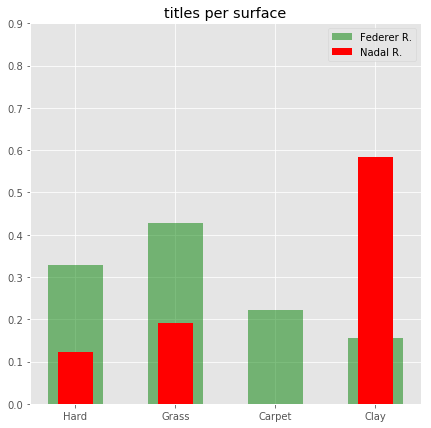

In [4]:

#surface wise analysis
surf_dict1 = performance_df1.groupby('Surface').groups
surf_dict2 = performance_df2.groupby('Surface').groups
tourn_dict1 = {key: len(value) for key, value in surf_dict1.items()}
tourn_dict2 = {key: len(value) for key, value in surf_dict2.items()}

#titles won surfaceWise
Hard_title_df1 = titles_df1[titles_df1.Surface == 'Hard']
Grass_title_df1 = titles_df1[titles_df1.Surface == 'Grass']
Carpet_title_df1 = titles_df1[titles_df1.Surface == 'Carpet']
Clay_title_df1 = titles_df1[titles_df1.Surface == 'Clay']
      
#titles won surfaceWise
Hard_title_df2 = titles_df2[titles_df2.Surface == 'Hard']
Grass_title_df2 = titles_df2[titles_df2.Surface == 'Grass']
Carpet_title_df2 = titles_df2[titles_df2.Surface == 'Carpet']
Clay_title_df2 = titles_df2[titles_df2.Surface == 'Clay']

print(player1,":")
print( 'tournaments played: ' ,tourn_dict1)      
print('Hard Court titles: ',len(Hard_title_df1), 'Grass Court titles: ',len(Grass_title_df1), 'Carpet Court titles: ',len(Carpet_title_df1), 'Clay Court titles: ',len(Clay_title_df1))
print('\n\n',player2,":")
print( 'tournaments played: ' ,tourn_dict2)
print('Hard Court titles: ',len(Hard_title_df2), 'Grass Court titles: ',len(Grass_title_df2), 'Carpet Court titles: ',len(Carpet_title_df2), 'Clay Court titles: ',len(Clay_title_df2))

fig, ax = plt.subplots(figsize = (7,7))
plt.bar(['Hard','Grass','Carpet','Clay'],[len(Hard_title_df1)/tourn_dict1['Hard'],len(Grass_title_df1)/tourn_dict1['Grass'], len(Carpet_title_df1)/tourn_dict1['Carpet'], len(Clay_title_df1)/tourn_dict1['Clay']],width= 0.55,  color='g', alpha = 0.5)
plt.bar(['Hard','Grass','Carpet','Clay'],[len(Hard_title_df2)/tourn_dict2['Hard'],len(Grass_title_df2)/tourn_dict2['Grass'], len(Carpet_title_df2)/tourn_dict2['Carpet'], len(Clay_title_df2)/tourn_dict2['Clay']],width= 0.35,  color='r')
ax.set_yticks(np.arange(0, 1.0, 0.1))
plt.legend([player1,player2])
plt.title('titles per surface')
plt.show()

This shows Nadal is very strong on Clay while Federer favours grass, Though Nadal is better or clay than Federer on grass.
Federer is more of versetile than Nadal.

# Rank Analysis

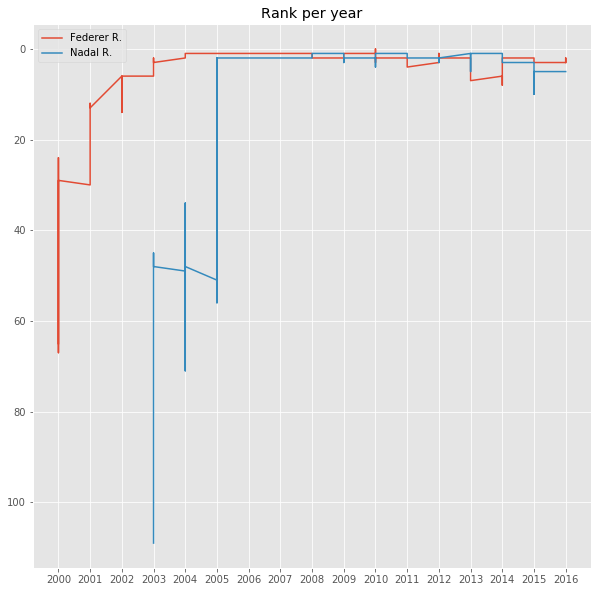

In [5]:
#rank analysis
rank1 = [int(performance_df1.WRank[row]) if performance_df1.Winner[row]==player1 else int(performance_df1.LRank[row]) for row in range(len(performance_df1))]
rank1 = [rank if rank < 1000 else 0  for rank in rank1 ]

rank2 = [int(performance_df2.WRank[row]) if performance_df2.Winner[row]==player2 else int(performance_df2.LRank[row]) for row in range(len(performance_df2))]
rank2 = [rank if rank < 1000 else mode(rank2)  for rank in rank2 ]

fig,ax = plt.subplots(figsize = (10,10))
plt.plot(performance_df1.Year, rank1)
plt.plot(performance_df2.Year, rank2)
plt.gca().invert_yaxis()
plt.legend([player1,player2])
plt.title('Rank per year')
plt.show()


# Performance against better and worse ranked players

c:\users\varundandekar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\varundandekar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\varundandekar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

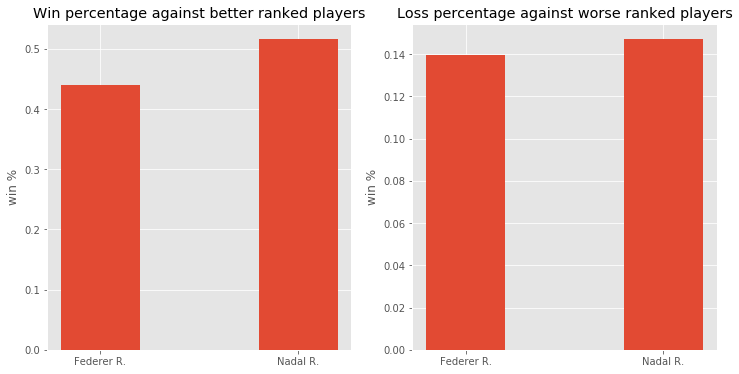

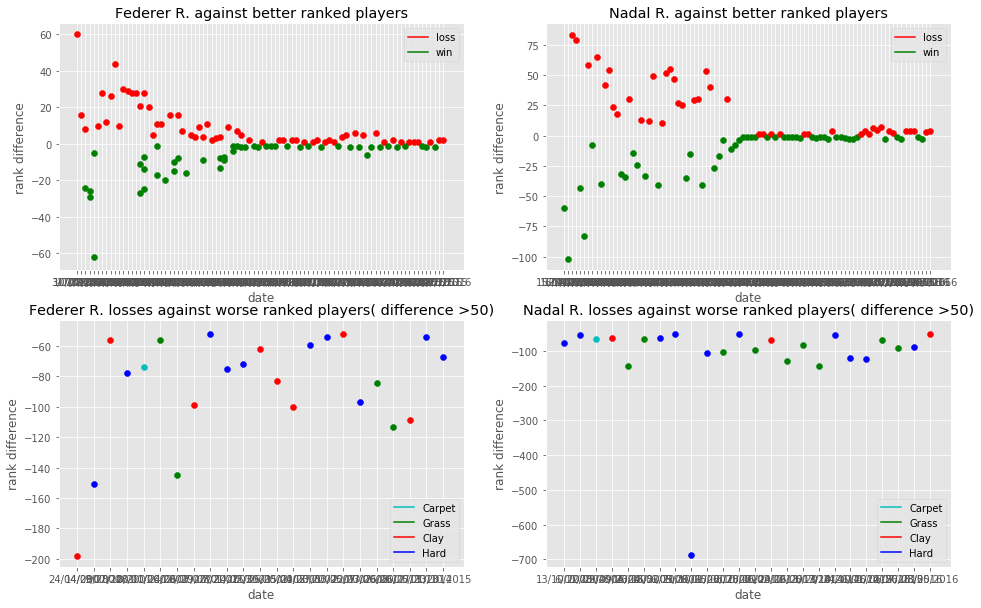

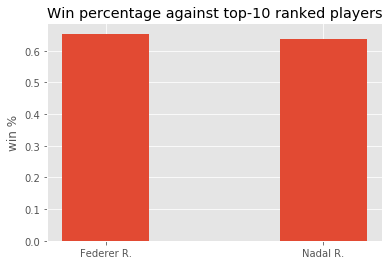

In [6]:
#performance against better ranked players
better_rank = ((df1.Winner == player1) & (df1.WRank > df1.LRank)) | ((df1.Loser == player1) & (df1.WRank < df1.LRank))
better_rank_df1 = df1[better_rank]
better_rank_df1['Won']  = [1 if better_rank_df1.iloc[b].Winner == player1 else 0 for b in range(len(better_rank_df1))]

better_rank = ((df2.Winner == player2) & (df2.WRank > df2.LRank)) | ((df2.Loser == player2) & (df2.WRank < df2.LRank))
better_rank_df2 = df2[better_rank]
better_rank_df2['Won']  = [1 if better_rank_df2.iloc[b].Winner == player2 else 0 for b in range(len(better_rank_df2))]

#win percentage against better ranked player
win_against_better_rank1 = len(better_rank_df1[better_rank_df1.Winner == player1])/len(better_rank_df1)
win_against_better_rank2 = len(better_rank_df2[better_rank_df2.Winner == player2])/len(better_rank_df2)


#performance against worse ranked players
worse_rank = ((df1.Winner == player1) & (df1.WRank < df1.LRank)) | ((df1.Loser == player1) & (df1.WRank > df1.LRank))
worse_rank_df1 = df1[worse_rank]
worse_rank_df1['Won']  = [1 if worse_rank_df1.iloc[b].Winner == player1 else 0 for b in range(len(worse_rank_df1))]

worse_rank = ((df2.Winner == player2) & (df2.WRank < df2.LRank)) | ((df2.Loser == player2) & (df2.WRank > df2.LRank))
worse_rank_df2 = df2[worse_rank]
worse_rank_df2['Won']  = [1 if worse_rank_df2.iloc[b].Winner == player2 else 0 for b in range(len(worse_rank_df2))]

#loss percentage against better ranked player
loss_against_better_rank1 = len(worse_rank_df1[worse_rank_df1.Loser == player1])/len(worse_rank_df1)
loss_against_better_rank2 = len(worse_rank_df2[worse_rank_df2.Loser == player2])/len(worse_rank_df2)


fig= plt.figure(figsize = (12,6))

fig.add_subplot(1,2,1)
plt.bar([player1,player2],[win_against_better_rank1,win_against_better_rank2],width=0.4)
plt.title('Win percentage against better ranked players')
plt.ylabel('win %')

fig.add_subplot(1,2,2)
plt.bar([player1,player2],[loss_against_better_rank1,loss_against_better_rank2],width=0.4)
plt.title('Loss percentage against worse ranked players' )
plt.ylabel('win %')
plt.show()

colors = ['r','g']
surface = {'Carpet':'c','Clay':'r','Grass':'g','Hard':'b'}


fig= plt.figure(figsize = (16,10))
fig.add_subplot(2,2,1)
temp = better_rank_df1[better_rank_df1.Diff<500]
plt.plot([],[],c='r',label ='loss')
plt.plot([],[],c='g',label ='win')
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = colors[temp.iloc[i].Won])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend()
plt.title(player1+ ' against better ranked players')


fig.add_subplot(2,2,2)
temp = better_rank_df2[better_rank_df2.Diff<500]
plt.plot([],[],c='r',label ='loss')
plt.plot([],[],c='g',label ='win')
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = colors[temp.iloc[i].Won])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend()
plt.title(player2+ ' against better ranked players')



fig.add_subplot(2,2,3)
temp = worse_rank_df1[worse_rank_df1.Diff < -50]
plt.plot([],[],c='c',label ='Carpet')
plt.plot([],[],c='g',label ='Grass')
plt.plot([],[],c='r',label ='Clay')
plt.plot([],[],c='b',label ='Hard')
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = surface[temp.iloc[i].Surface])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend(loc=4)
plt.title(player1+ ' losses against worse ranked players( difference >50)')


fig.add_subplot(2,2,4)
plt.plot([],[],c='c',label ='Carpet')
plt.plot([],[],c='g',label ='Grass')
plt.plot([],[],c='r',label ='Clay')
plt.plot([],[],c='b',label ='Hard')
temp = worse_rank_df2[worse_rank_df2.Diff < -50]
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = surface[temp.iloc[i].Surface])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend(loc=4)
plt.title(player2+ ' losses against worse ranked players( difference >50)')
plt.show()


#performance against top 10
winner = df1.Winner == player1
loser = df1.Loser == player1
rank1 = df1.WRank<=10
rank2 = df1.LRank<=10
top10df1 = df1[(winner & rank2) | (loser & rank1)]

winner = df2.Winner == player2
loser = df2.Loser == player2
rank1 = df2.WRank<=10
rank2 = df2.LRank<=10
top10df2 = df2[(winner & rank2) | (loser & rank1)]

plt.bar([player1,player2],[(len(top10df1[top10df1.Winner==player1])/len(top10df1)),(len(top10df2[top10df2.Winner==player2])/len(top10df2))],width=0.4)
plt.title('Win percentage against top-10 ranked players')
plt.ylabel('win %')
plt.show()



Nadal is better than Federer in terms of record against better ranked player but Federer wins in the record against worse ranked players. Nadal has more upsets as compared to Federer most of them come on grass. Also Federer has better performance against top 10 players than Nadal

# Match Analysis & Pressure Situations Analysis


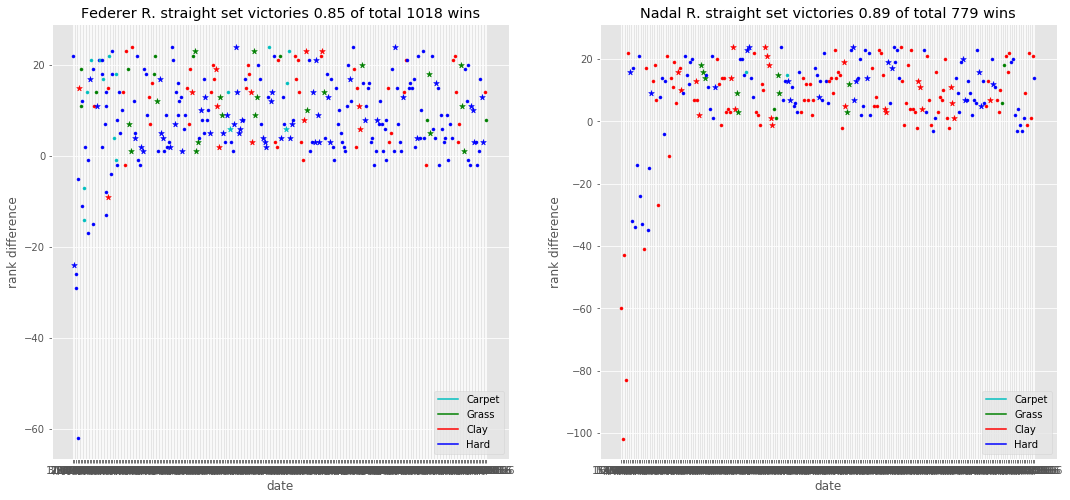

In [7]:
#best of 3 and 5 separation

sets={3:".",5:"*"}

tSetdf1 = df1[df1['Best of']==3]
tSetdf2 = df2[df2['Best of']==3]
fSetdf1 = df1[df1['Best of']==5]
fSetdf2 = df2[df2['Best of']==5]

#straight sets victories/losses
w3 = tSetdf1['W3'] == 0
l3 = tSetdf1['L3'] == 0
w4 = fSetdf1['W4'] == 0
l4 = fSetdf1['L4'] == 0
w5 = fSetdf1['W5'] == 0
l5 = fSetdf1['L5'] == 0
stset1 = tSetdf1[ w3 & l3].append(fSetdf1[ w4 & l4 & w5 & l5]).sort_values(['Year','ATP'],ascending=[1,1])

w3 = tSetdf2['W3'] == 0
l3 = tSetdf2['L3'] == 0
w4 = fSetdf2['W4'] == 0
l4 = fSetdf2['L4'] == 0
w5 = fSetdf2['W5'] == 0
l5 = fSetdf2['L5'] == 0
stset2 = tSetdf2[ w3 & l3].append(fSetdf2[ w4 & l4 & w5 & l5]).sort_values(['Year','ATP'],ascending=[1,1])


fig= plt.figure(figsize = (18,8))
fig.add_subplot(1,2,1)
winner = stset1.Winner == player1
rank = stset1.Diff < 25
temp = stset1[ winner & rank]
plt.plot([],[],c='c',label ='Carpet')
plt.plot([],[],c='g',label ='Grass')
plt.plot([],[],c='r',label ='Clay')
plt.plot([],[],c='b',label ='Hard')
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = surface[temp.iloc[i].Surface],marker=sets[temp.iloc[i]['Best of']])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend(loc=4)
plt.title(player1+ ' straight set victories '+str(round(len(stset1)/len(win_df1),2))+' of total '+str(len(win_df1))+ ' wins')


fig.add_subplot(1,2,2)
plt.plot([],[],c='c',label ='Carpet')
plt.plot([],[],c='g',label ='Grass')
plt.plot([],[],c='r',label ='Clay')
plt.plot([],[],c='b',label ='Hard')
winner = stset2.Winner == player2
rank = stset2.Diff < 25
temp = stset2[ winner & rank]
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = surface[temp.iloc[i].Surface],marker=sets[temp.iloc[i]['Best of']])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend(loc=4)
plt.title(player2+ ' straight set victories '+str(round(len(stset2)/len(win_df2),2))+ ' of total '+str(len(win_df2))+ ' wins')

plt.show()


Straight sets percentage is pretty decent for both the players. Federer has around 4% less straight set wins but he has also played and won 250+ matches than Nadal.Most of the Federer's straight set wins seem to be coming on hard court while its clay for Nadal.Most of the Federer's best of 5 setter straight set wins( marker = star) come from hard and grass tournaments while its clay again for Nadal

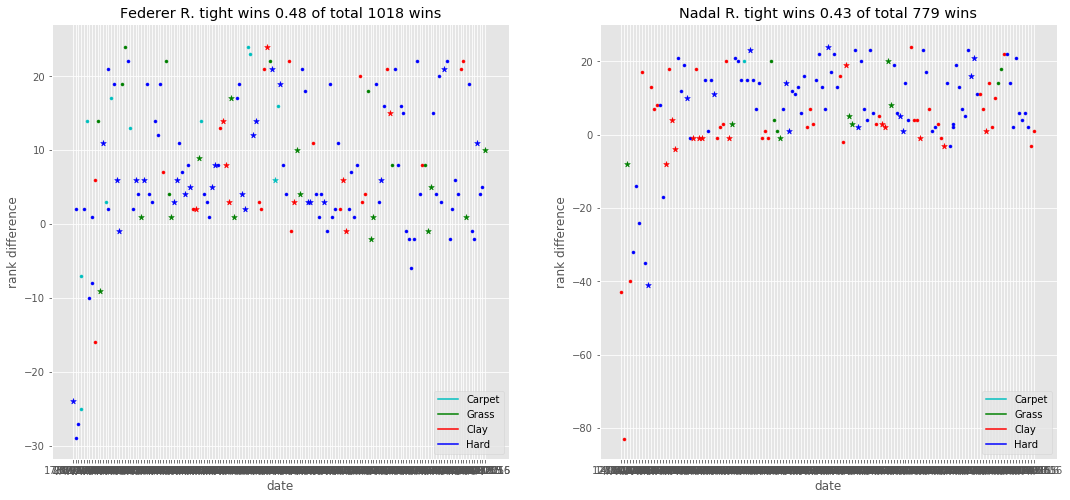

In [8]:
#tight match wins

#game difference less than or equal to 4 for best of 3 and 6 for best of 5
tight1 = tSetdf1[ tSetdf1['Sets Diff'] <= 4].append(fSetdf1[ fSetdf1['Sets Diff'] <= 6]).sort_values(['Year','ATP'],ascending=[1,1])
tight2 = tSetdf2[ tSetdf2['Sets Diff'] <= 4].append(fSetdf2[ fSetdf2['Sets Diff'] <= 6]).sort_values(['Year','ATP'],ascending=[1,1])

fig= plt.figure(figsize = (18,8))
fig.add_subplot(1,2,1)
winner = tight1.Winner == player1
rank = tight1.Diff < 25
temp = tight1[ winner & rank]
plt.plot([],[],c='c',label ='Carpet')
plt.plot([],[],c='g',label ='Grass')
plt.plot([],[],c='r',label ='Clay')
plt.plot([],[],c='b',label ='Hard')
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = surface[temp.iloc[i].Surface],marker=sets[temp.iloc[i]['Best of']])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend(loc=4)
plt.title(player1+ ' tight wins '+str(round(len(tight1)/len(win_df1),2))+' of total '+str(len(win_df1))+ ' wins')


fig.add_subplot(1,2,2)
plt.plot([],[],c='c',label ='Carpet')
plt.plot([],[],c='g',label ='Grass')
plt.plot([],[],c='r',label ='Clay')
plt.plot([],[],c='b',label ='Hard')
winner = tight2.Winner == player2
rank = tight2.Diff < 25
temp = tight2[ winner & rank]
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = surface[temp.iloc[i].Surface],marker=sets[temp.iloc[i]['Best of']])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend(loc=4)
plt.title(player2+ ' tight wins '+str(round(len(tight2)/len(win_df2),2))+ ' of total '+str(len(win_df2))+ ' wins')

plt.show()


In terms of tight matches again Federer and Nadal have a great and almost equal record.

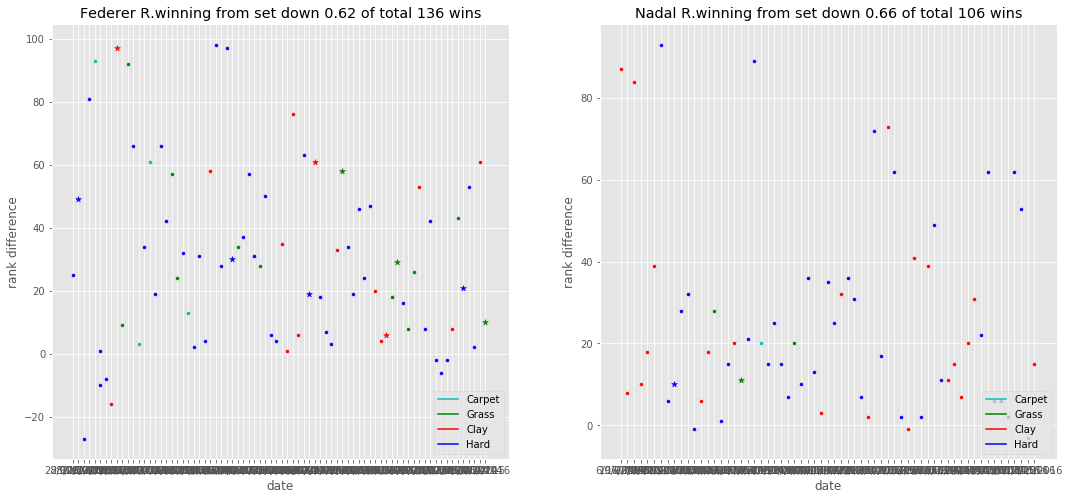

In [9]:
#winning from set down in best of 3 and 2 sets down in best of 5
#set down filtering
s1 = tSetdf1['W1'] < tSetdf1['L1']
s2 = fSetdf1['W1'] < fSetdf1['L1']
s3 = fSetdf1['W2'] < fSetdf1['L2']
tight1 = tSetdf1[s1].append(fSetdf1[ s2 & s3]).sort_values(['Year','ATP'],ascending=[1,1])

s1 = tSetdf2['W1'] < tSetdf2['L1']
s2 = fSetdf2['W1'] < fSetdf2['L1']
s3 = fSetdf2['W2'] < fSetdf2['L2']
tight2 = tSetdf2[s1].append(fSetdf2[ s2 & s3]).sort_values(['Year','ATP'],ascending=[1,1])

fig= plt.figure(figsize = (18,8))
fig.add_subplot(1,2,1)
winner = tight1.Winner == player1
rank = tight1.Diff < 100
temp = tight1[ winner & rank]
plt.plot([],[],c='c',label ='Carpet')
plt.plot([],[],c='g',label ='Grass')
plt.plot([],[],c='r',label ='Clay')
plt.plot([],[],c='b',label ='Hard')
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = surface[temp.iloc[i].Surface],marker=sets[temp.iloc[i]['Best of']])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend(loc=4)
plt.title(player1+ 'winning from set down '+str(round(len(tight1[winner])/len(tight1),2))+' of total '+str(len(tight1))+ ' wins')


fig.add_subplot(1,2,2)
plt.plot([],[],c='c',label ='Carpet')
plt.plot([],[],c='g',label ='Grass')
plt.plot([],[],c='r',label ='Clay')
plt.plot([],[],c='b',label ='Hard')
winner = tight2.Winner == player2
rank = tight2.Diff < 100
temp = tight2[ winner & rank]
for i in range(len(temp)):
    plt.scatter(temp.iloc[i].Date,temp.iloc[i].Diff,c = surface[temp.iloc[i].Surface],marker=sets[temp.iloc[i]['Best of']])
plt.xlabel('date')
plt.ylabel('rank difference')
plt.legend(loc=4)
plt.title(player2+ 'winning from set down '+str(round(len(tight2[winner])/len(tight2),2))+ ' of total '+str(len(tight2))+ ' wins')

plt.show()



Federer won 62% matches when set down out of 136 while its 66% of 106 for Nadal.